#### regression_model_practice_w3_Dec'20

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\regression_practice\admission_predict\Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.describe().round(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,200.50,316.81,107.41,3.09,3.40,3.45,8.60,0.55,0.72
std,115.61,11.47,6.07,1.14,1.01,0.90,0.60,0.50,0.14
min,1.00,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,100.75,308.00,103.00,2.00,2.50,3.00,8.17,0.00,0.64
50%,200.50,317.00,107.00,3.00,3.50,3.50,8.61,1.00,0.73
75%,300.25,325.00,112.00,4.00,4.00,4.00,9.06,1.00,0.83
max,400.00,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


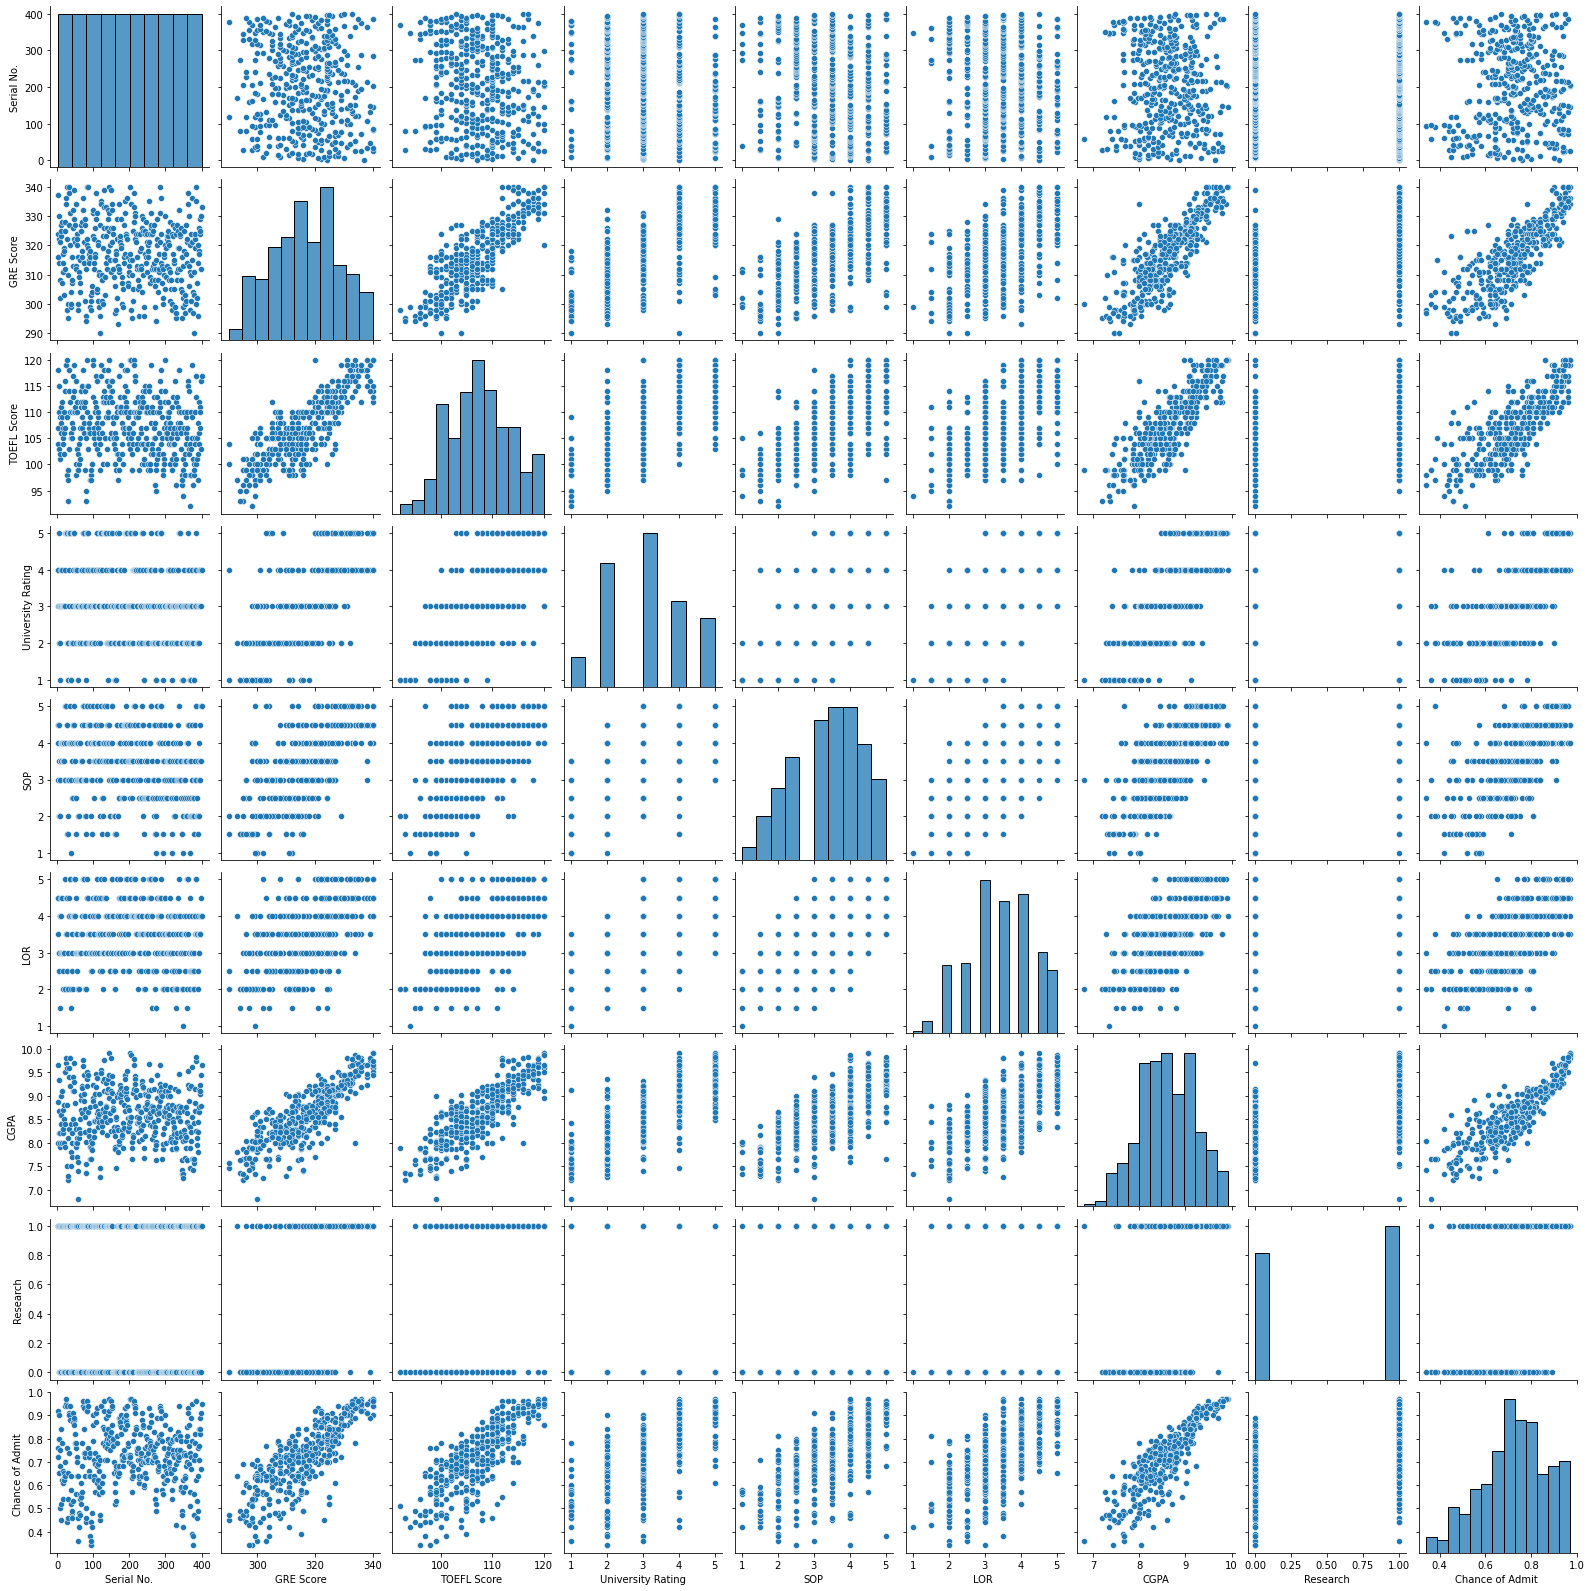

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [11]:
df.shape

(400, 9)

In [15]:
x  = df.iloc[:,1:8].values
y = df.iloc[:,8].values

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=11)

In [17]:
len(x_train), len(x_test), len(y_train), len(y_test)

(280, 120, 280, 120)

##### linear regression

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
r2_score(y_test, y_pred_lr)

0.8044007811651503

In [22]:
mean_absolute_error(y_test, y_pred_lr)

0.044332142755106455

In [23]:
(mean_squared_error(y_test, y_pred_lr))**0.5

0.05726372299091375

In [26]:
x2 = df[['GRE Score', 'TOEFL Score', 'CGPA']].values

In [27]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.3, random_state=11)

In [28]:
len(x2_train), len(x2_test), len(y2_train), len(y2_test)

(280, 120, 280, 120)

In [29]:
lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)
y_pred_lr2 = lr2.predict(x2_test)

In [30]:
r2_score(y2_test, y_pred_lr2)

0.8008090765916591

In [31]:
mean_absolute_error(y2_test, y_pred_lr2)

0.045882477824786945

In [32]:
(mean_squared_error(y2_test, y_pred_lr2))**0.5

0.05778708594177026

##### decision tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [37]:
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [38]:
r2_score(y_test ,y_pred_dt)

0.4140912374652872

In [39]:
mean_absolute_error(y_test ,y_pred_dt)

0.06991666666666667

In [40]:
(mean_squared_error(y_test ,y_pred_dt))**0.5

0.09910852637386956

#### grid search on decision tree

In [41]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'min_samples_split':list(range(1,11))}]

In [42]:
grid_search = GridSearchCV(estimator=dt, param_grid=parameters, scoring='r2', n_jobs=-1)
grid_search = grid_search.fit(x_train, y_train)

In [43]:
grid_search.best_params_

{'criterion': 'friedman_mse', 'min_samples_split': 10, 'splitter': 'random'}

In [44]:
grid_search.best_score_

0.6758927427448959

In [45]:
dt2 = DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=10, splitter='random')

In [46]:
dt2.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=10,
                      splitter='random')

In [47]:
y_pred_dt2 = dt2.predict(x_test)

In [48]:
r2_score(y_test, y_pred_dt2)

0.5515629536297727

In [51]:
dt2 = DecisionTreeRegressor(min_samples_split=10, splitter='random')
dt2.fit(x_train, y_train)
y_pred_dt2 = dt2.predict(x_test)
r2_score(y_test, y_pred_dt2)

0.7066165020394101

##### cross validation on decesion tree

In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dt2, X=x_train, y=y_train, cv=10)

In [53]:
accuracies

array([0.22980105, 0.63717296, 0.66245144, 0.73429392, 0.78463734,
       0.70137186, 0.63469421, 0.64535657, 0.61436349, 0.69113891])

In [54]:
accuracies.mean()

0.6335281765019289

In [55]:
#better to re-look into the model as 1st portion has a accuracy of 0.22

##### random forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)

In [70]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [71]:
r2_score(y_test, y_pred_rf)

0.6975046559871687

In [72]:
mean_absolute_error(y_test, y_pred_rf)

0.052116666666666665

In [73]:
(mean_squared_error(y_test, y_pred_rf))**0.5

0.07121235847800576

In [61]:
parameters = [{'n_estimators':list(range(2,100)), 'criterion':['mae', 'mse'], 'max_depth':[2,3,4,5], 'min_samples_split':[2,3,4,5,6,7,8,9], 'max_features':['auto', 'sqrt', 'log2']}]

In [62]:
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search = grid_search.fit(x_train, y_train)

In [63]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 27}

In [64]:
grid_search.best_score_

-0.004767397671774989

In [65]:
rf = RandomForestRegressor(n_estimators=27, criterion='mse', max_depth=5, max_features='log2', min_samples_split=2)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_score(y_test, y_pred_rf)

0.7816457809086146

In [67]:
mean_absolute_error(y_test, y_pred_rf)

0.045402763672104114

In [68]:
(mean_squared_error(y_test, y_pred_rf))**0.5

0.06050298700682041

#### lasso

In [78]:
from sklearn.linear_model import Lasso

In [79]:
ls = Lasso()
ls.fit(x_train, y_train)
y_pred_ls = ls.predict(x_test)

In [80]:
r2_score(y_test, y_pred_ls)

0.3001969479099088

In [81]:
(mean_squared_error(y_test, y_pred_ls))**0.5

0.1083138363493403

#### ridge

In [82]:
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(x_train, y_train)

Ridge()

In [83]:
y_pred_rg = rg.predict(x_test)

In [84]:
r2_score(y_test, y_pred_rg)

0.8047817333180125

In [85]:
(mean_squared_error(y_test, y_pred_rg))**0.5

0.05720793194347651